In [1]:
### Importing Libraries ###

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
### Loading the data set ###
df = pd.read_csv("day.csv")

In [3]:
### Understanding and Preparing the Data ###
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [5]:
### Checking for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
### As we can understand now that there are 730 non-null values so there is no missing values. 
### hence we no longer need to work on the data cleaning for missing values.

In [7]:
### Data Column is of object data type hence we need to convert it to datatime data type for better analysis.
df['dteday'] = pd.to_datetime(df['dteday'], dayfirst=True)

In [8]:
### Verify the conversion
print(df['dteday'].head())

0   2018-01-01
1   2018-01-02
2   2018-01-03
3   2018-01-04
4   2018-01-05
Name: dteday, dtype: datetime64[ns]


In [9]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
### Drop unnecessary columns
df.drop('instant', axis=1, inplace=True)

In [11]:
### Convert Categorical Columns ###
# Replace season and weathersit values with labels
df['season'] = df['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
df['weathersit'] = df['weathersit'].map({1: 'Clear', 2: 'Mist/Cloudy', 3: 'Light Snow/Rain', 4: 'Heavy Rain'})

# Map weekday to names (optional)
df['weekday'] = df['weekday'].map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 
                                   4: 'Thursday', 5: 'Friday', 6: 'Saturday'})

In [12]:
### Feature Relationship ###
### Drop casual and registered since cnt is the target variable
df.drop(['casual', 'registered'], axis=1, inplace=True)

In [13]:
### Validate the final dataset ###
print(df.head())
print(df.info())

      dteday  season  yr  mnth  holiday    weekday  workingday   weathersit  \
0 2018-01-01  Spring   0     1        0   Saturday           0  Mist/Cloudy   
1 2018-01-02  Spring   0     1        0     Sunday           0  Mist/Cloudy   
2 2018-01-03  Spring   0     1        0     Monday           1        Clear   
3 2018-01-04  Spring   0     1        0    Tuesday           1        Clear   
4 2018-01-05  Spring   0     1        0  Wednesday           1        Clear   

        temp     atemp      hum  windspeed   cnt  
0  14.110847  18.18125  80.5833  10.749882   985  
1  14.902598  17.68695  69.6087  16.652113   801  
2   8.050924   9.47025  43.7273  16.636703  1349  
3   8.200000  10.60610  59.0435  10.739832  1562  
4   9.305237  11.46350  43.6957  12.522300  1600  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      7

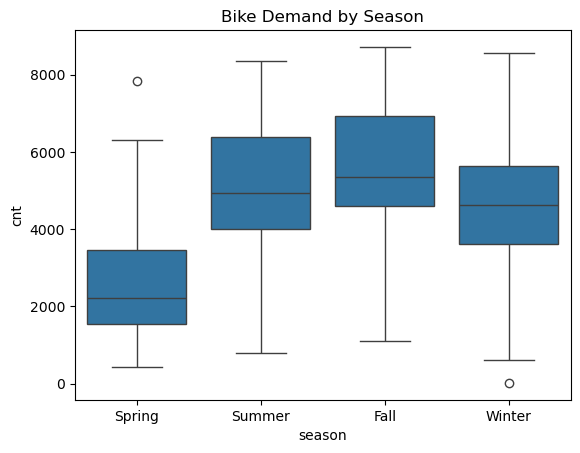

In [14]:
### Plot a boxplot or bar chart to visualize average cnt per season

sns.boxplot(x='season', y='cnt', data=df)
plt.title('Bike Demand by Season')
plt.show()

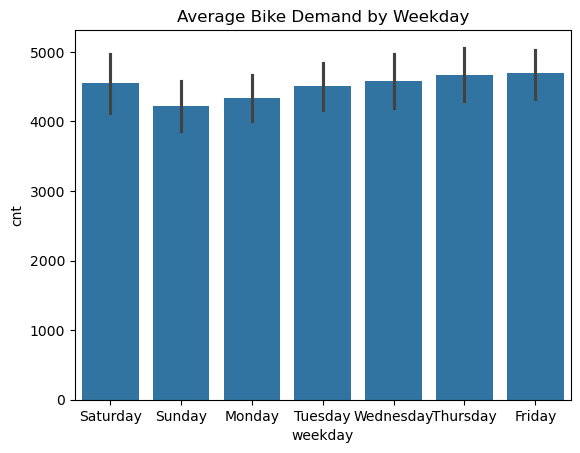

In [15]:
### Compare average demand (cnt) across weekdays 
sns.barplot(x='weekday', y='cnt', data=df, estimator='mean')
plt.title('Average Bike Demand by Weekday')
plt.show()

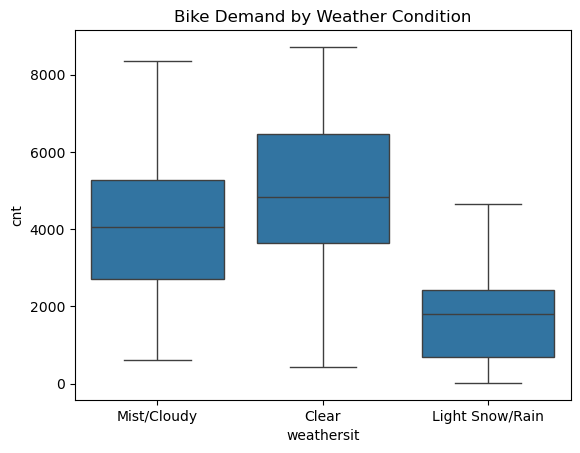

In [16]:
### Analyze the average bike demand by weather condition

sns.boxplot(x='weathersit', y='cnt', data=df)
plt.title('Bike Demand by Weather Condition')
plt.show()

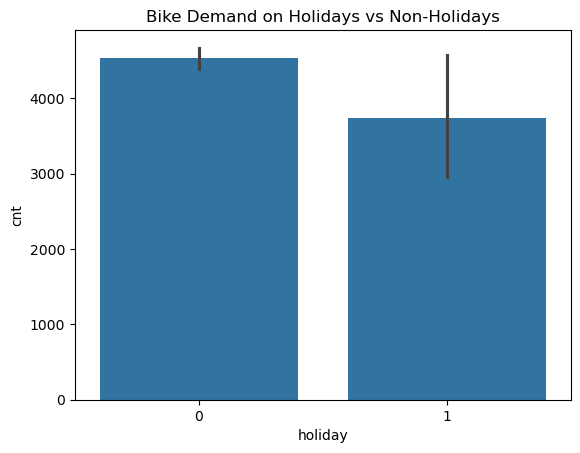

In [17]:
### Compare the mean cnt on holidays vs. non-holidays. ###

sns.barplot(x='holiday', y='cnt', data=df, estimator='mean')
plt.title('Bike Demand on Holidays vs Non-Holidays')
plt.show()

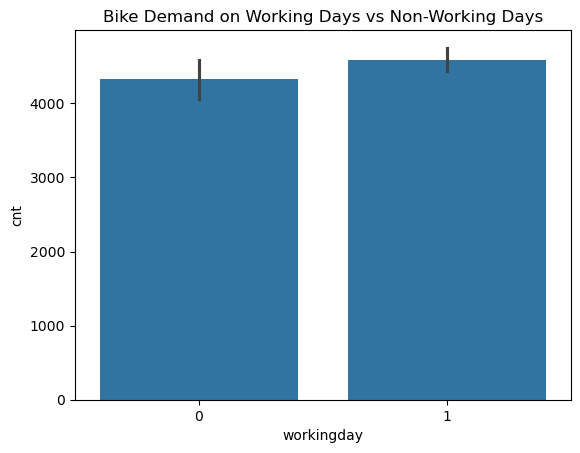

In [18]:
### Analyze the demand for working days vs. non-working days ###

sns.barplot(x='workingday', y='cnt', data=df, estimator='mean')
plt.title('Bike Demand on Working Days vs Non-Working Days')
plt.show()

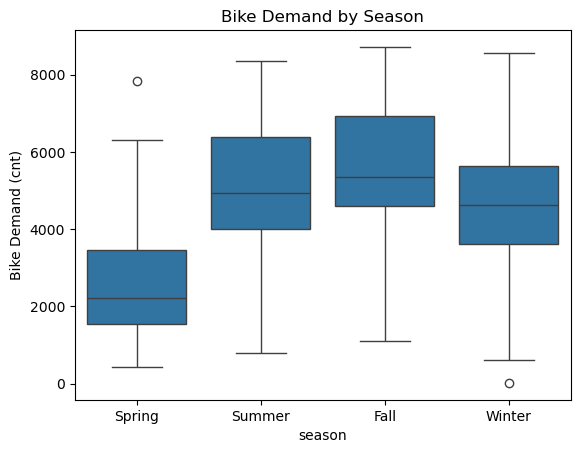

In [19]:
sns.boxplot(x='season', y='cnt', data=df)
plt.title('Bike Demand by Season')
plt.ylabel('Bike Demand (cnt)')
plt.show()

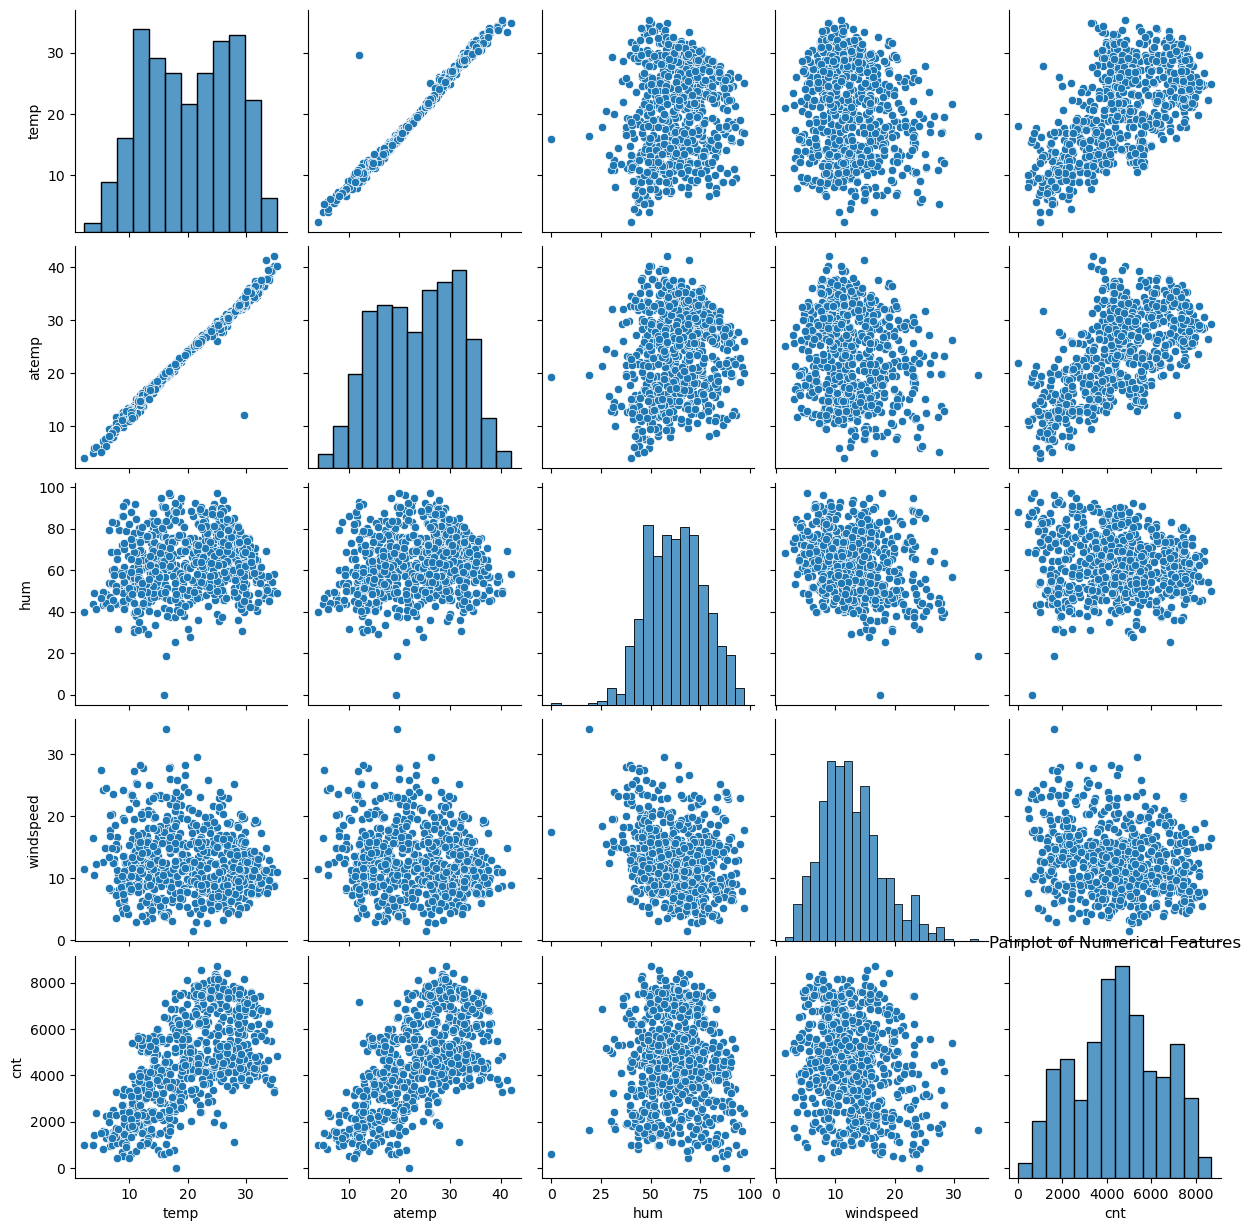

In [20]:
### Generate a pair plot to observe relationship for temp, atemp, hum, windspeed, and cnt

sns.pairplot(df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']])
plt.title("Pairplot of Numerical Features")
plt.show()

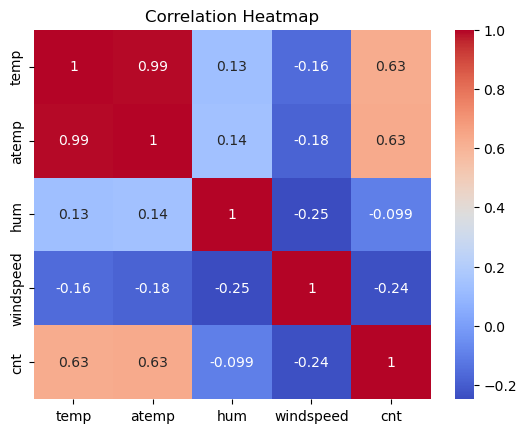

In [21]:
### Lets generate a heatmap to see correlations between numerical variables and identify multicollinearity

corr_matrix = df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [22]:
### Convert categorical columns (season, weathersit, weekday) into dummy variables to use them in the model

df_encoded = pd.get_dummies(df, columns=['season', 'weathersit', 'weekday'], drop_first=True)
print(df_encoded.head())

      dteday  yr  mnth  holiday  workingday       temp     atemp      hum  \
0 2018-01-01   0     1        0           0  14.110847  18.18125  80.5833   
1 2018-01-02   0     1        0           0  14.902598  17.68695  69.6087   
2 2018-01-03   0     1        0           1   8.050924   9.47025  43.7273   
3 2018-01-04   0     1        0           1   8.200000  10.60610  59.0435   
4 2018-01-05   0     1        0           1   9.305237  11.46350  43.6957   

   windspeed   cnt  ...  season_Summer  season_Winter  \
0  10.749882   985  ...          False          False   
1  16.652113   801  ...          False          False   
2  16.636703  1349  ...          False          False   
3  10.739832  1562  ...          False          False   
4  12.522300  1600  ...          False          False   

   weathersit_Light Snow/Rain  weathersit_Mist/Cloudy  weekday_Monday  \
0                       False                    True           False   
1                       False                   

In [23]:
### Split the dataset into training and testing sets

from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns=['cnt', 'dteday'])
y = df_encoded['cnt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(584, 19) (146, 19) (584,) (146,)


In [24]:
### Build Multiple Linear Regression model using scikit-learn

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)

print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Model Coefficients: [ 1988.56745954   -28.68446711  -357.77061988   258.75414578
    97.08335518    25.71231377   -10.9442879    -41.78639908
  -982.82214403   242.76389421   802.4030099  -2105.22598784
  -430.47372766  -218.41742197   277.47129279  -178.4548187
   -44.04637784  -129.3328376     13.43262357]
Intercept: 2374.69262374006


In [25]:
### Evaluate the model - Calculate the R-squared score for both training and test sets

from sklearn.metrics import r2_score

y_test_pred = model.predict(X_test)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("R-squared on Training Set:", r2_train)
print("R-squared on Test Set:", r2_test)

R-squared on Training Set: 0.8219701614367605
R-squared on Test Set: 0.8503468180334381


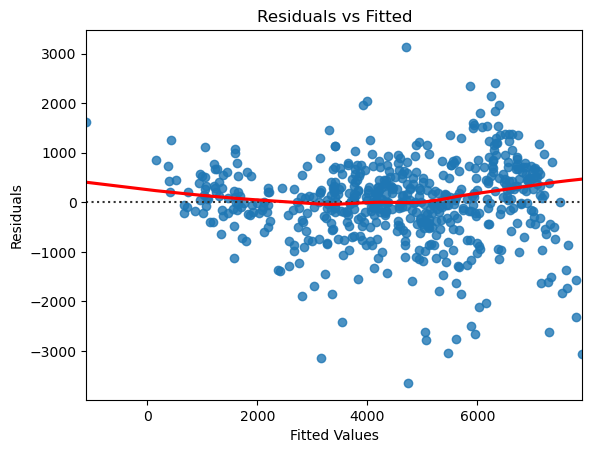

In [26]:
### Lets generate a residual plot to check model assumptions

residuals = y_train - y_train_pred
sns.residplot(x=y_train_pred, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.title("Residuals vs Fitted")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

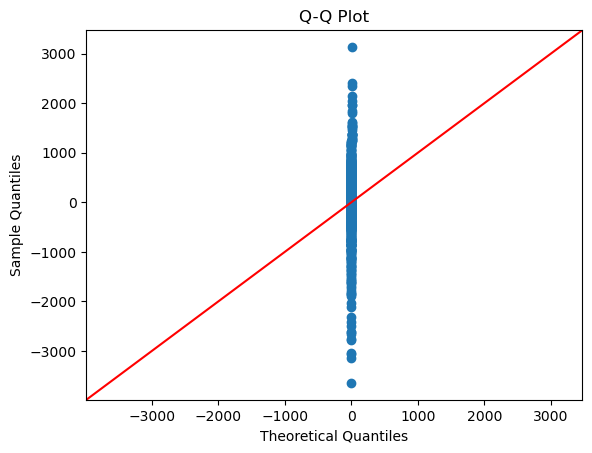

In [27]:
### We will check the normality of residuals using a Q-Q plot

import statsmodels.api as sm

sm.qqplot(residuals, line='45')
plt.title("Q-Q Plot")
plt.show()

In [31]:
### Multicollinearity Check -- Calculate Variance Inflation Factor (VIF) to detect multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select only numeric columns for VIF calculation
numeric_columns = X_train.select_dtypes(include=[np.number])
vif_data = pd.DataFrame()
vif_data["feature"] = numeric_columns.columns
vif_data["VIF"] = [variance_inflation_factor(numeric_columns.values, i) for i in range(numeric_columns.shape[1])]

print(vif_data)

      feature          VIF
0          yr     2.015866
1        mnth     5.295012
2     holiday     1.100806
3  workingday     3.233492
4        temp  1157.931576
5       atemp  1307.655467
6         hum    15.171984
7   windspeed     5.050703


In [ ]:
### Observations:

1. temp has an extremely high VIF of 1157.93.
2. atemp also has a very high VIF of 1307.65.
3. These indicate severe multicollinearity between temp and atemp.
4. Other features have acceptable VIF values (below 10), indicating no significant multicollinearity for them.

In [33]:
# Since temp and atemp is highly correletaed, we will drop atemp from the model.

In [34]:
X_train.drop('atemp', axis=1, inplace=True)
X_test.drop('atemp', axis=1, inplace=True)

In [35]:
# Recalculate VIF post dropping of atemp from the model.

numeric_columns = X_train.select_dtypes(include=[np.number])
vif_data = pd.DataFrame()
vif_data["feature"] = numeric_columns.columns
vif_data["VIF"] = [variance_inflation_factor(numeric_columns.values, i) for i in range(numeric_columns.shape[1])]

print(vif_data)

      feature        VIF
0          yr   1.982570
1        mnth   5.194382
2     holiday   1.100632
3  workingday   3.189408
4        temp   8.178492
5         hum  11.979483
6   windspeed   5.050534


In [36]:
# Refit the model
model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("R-squared on Training Set:", r2_train)
print("R-squared on Test Set:", r2_test)

R-squared on Training Set: 0.8219083208397048
R-squared on Test Set: 0.849771253319557


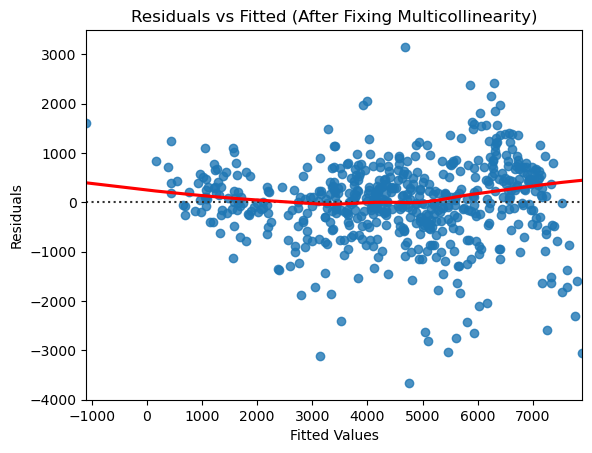

In [37]:
# Check if residuals has improved after refitting the model post dropping of atemp

residuals = y_train - y_train_pred
sns.residplot(x=y_train_pred, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.title("Residuals vs Fitted (After Fixing Multicollinearity)")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

## Post Multicollinearity Fix, the following has been observed

1. After dropping atemp, the VIF values for all features are below 10, indicating that multicollinearity has been successfully resolved.
2. temp has a reasonable VIF of 11.97 (previously ~1157)


In [39]:
### Feature Important Analysis

coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model.coef_})
coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()
coefficients.sort_values('Abs_Coefficient', ascending=False, inplace=True)

print("Top 3 Most Important Features:")
print(coefficients.head(3))


Top 3 Most Important Features:
                       Feature  Coefficient  Abs_Coefficient
10  weathersit_Light Snow/Rain -2119.770398      2119.770398
0                           yr  1989.531861      1989.531861
7                season_Spring  -975.659763       975.659763


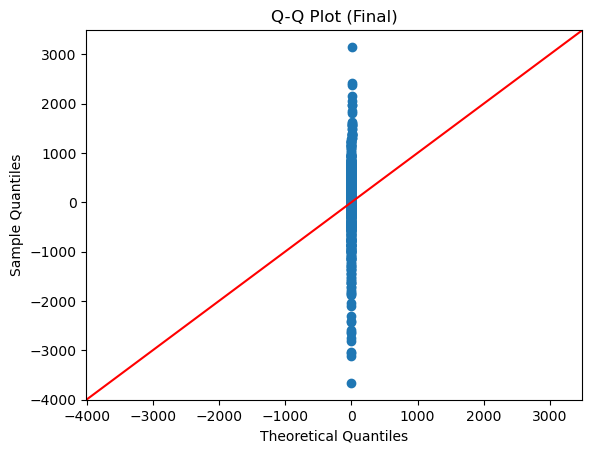

In [40]:
## Q-Q Plot (Final Check for Normality of Residuals)

import statsmodels.api as sm
sm.qqplot(residuals, line='45')
plt.title("Q-Q Plot (Final)")
plt.show()

# Analysis of Important Features, Q-Q Plot and Key Findings

1. TOP 3 Important Features:

   a) weathersit_Light Snow/Rain:

      Coefficient: -2119.77
      Interpretation: Light snow or rain significantly reduces bike demand by approximately 2119 rides.
      This highlights the critical impact of weather on bike usage.
   
   
   b) yr (Year):

      Coefficient: 1989.53
      Interpretation: Bike demand increased by ~1989 rides in 2019 compared to 2018.
      This aligns with the growing trend of bike-sharing popularity.


   c) season_Spring:

      Coefficient: -975.65
      Interpretation: Spring has lower demand compared to the baseline (likely Fall or Winter).
      This suggests that other seasons like Fall may have higher bike usage.


2. Q-Q Plot Analysis:

   a) The Q-Q plot shows that residuals deviate significantly from the diagonal line, indicating non-normality.
   b) There are heavy tails (outliers) at both extremes, suggesting that the model may not fully capture some       variations in the data.
   


3. Business Insights:

   a) Bike demand drops significantly during adverse weather conditions.
   b) The increasing trend from 2018 to 2019 indicates growth in bike usage.
   c) Spring shows lower demand, suggesting targeted marketing during this season.


In [43]:
print("Pandas Version:", pd.__version__)
print("NumPy Version:", np.__version__)
#print("Matplotlib Version:", matplotlib.__version__)
print("Seaborn Version:", sns.__version__)

Pandas Version: 2.0.3
NumPy Version: 1.24.3
Seaborn Version: 0.13.2
